In [1]:
# enable automatic reloading of the notebook
%load_ext autoreload
%autoreload 2

In [2]:
import random
from charts.bar_chart import bar_chart
from schema.constants import Figsize, Hatch

In [3]:
NUM_OF_POINTS = 10

In [4]:
charts = {
    "data": [
        {"label": f"xx{id}", "y": 100 * (id + 1) * random.random()}
        for id in range(NUM_OF_POINTS)
    ],
}

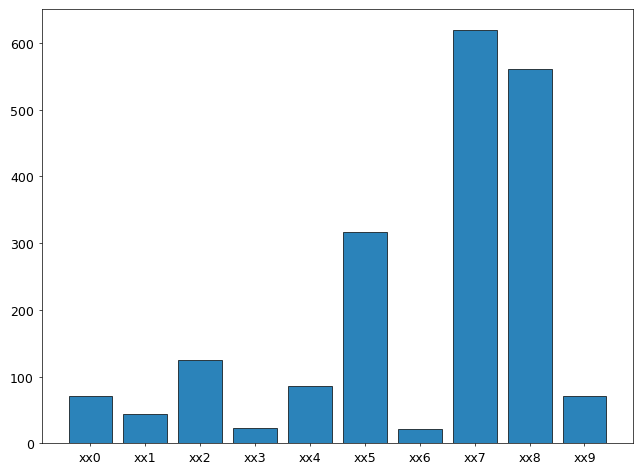

In [5]:
bar_chart(
    {
        "charts": charts,
    }
)

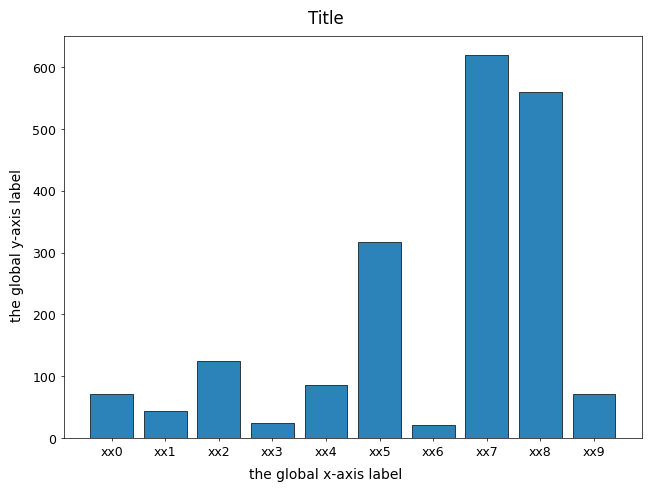

In [6]:
bar_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
    }
)

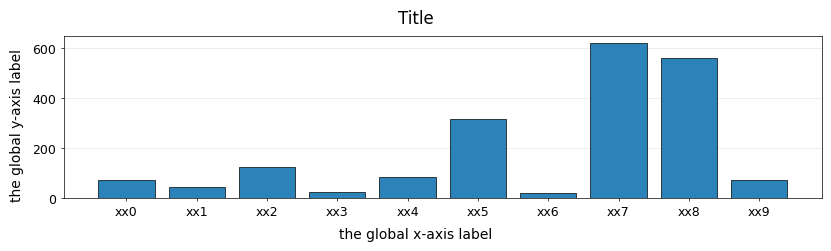

In [7]:
bar_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,  # must be a tuple (width, height), values are in inches
        "show_grid": "y",  # options: "both", "x", "y"
    }
)

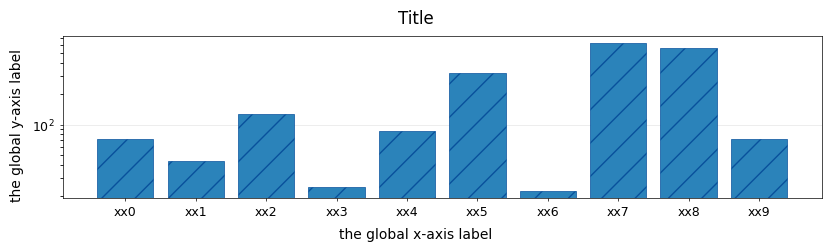

In [8]:
bar_chart(
    {
        "charts": {
            "data": charts["data"],
            "style": {  # define the style of the bars
                "plot.bar.hatch": Hatch.DIAGONAL,
                "plot.bar.edge.width": 0.5,
                "plot.bar.edge.color": "#08519c",
            },
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "show_grid": "y",
        "log_scale": True,
    }
)

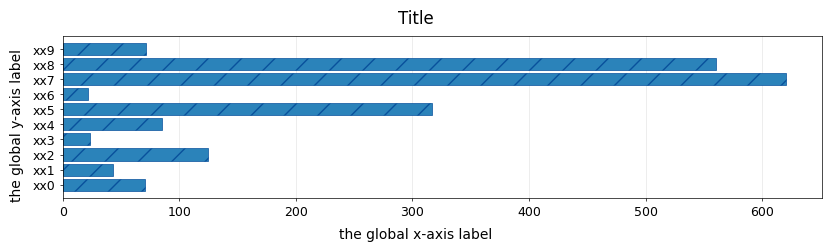

In [9]:
bar_chart(
    {
        "charts": {
            "data": charts["data"],
            "style": {
                "plot.bar.hatch": Hatch.DIAGONAL,
                "plot.bar.edge.width": 0.5,
                "plot.bar.edge.color": "#08519c",
            },
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "show_grid": "x",  # change the grid to match the change in orientation
        "orientation": "horizontal",  # options: "horizontal", "vertical"
    }
)

In [10]:
charts = [
    {
        "data": [
            {"label": f"xx{id}", "y": 100 * (id + 1) * random.random(), "yerr": 30}
            for id in range(NUM_OF_POINTS)
        ],
        "style": {
            "plot.bar.error.color": "#000000",
        },
        "subtitle": f"Bars {id}",
    }
    for id in range(2)
]

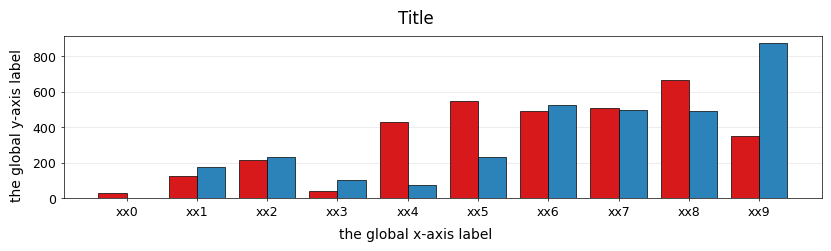

In [11]:
bar_chart(
    {
        # use a list of charts to define multiple bars
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "show_grid": "y",
    }
)

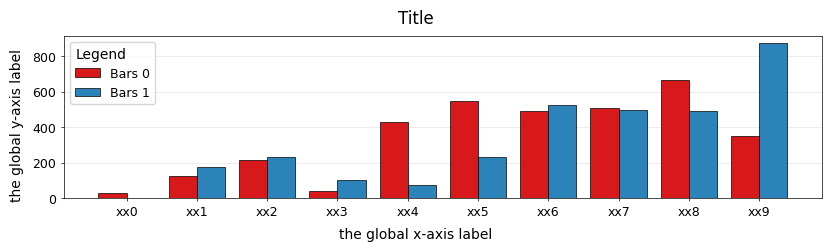

In [12]:
bar_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "show_grid": "y",
        "show_legend": True,  # show the legend
    }
)

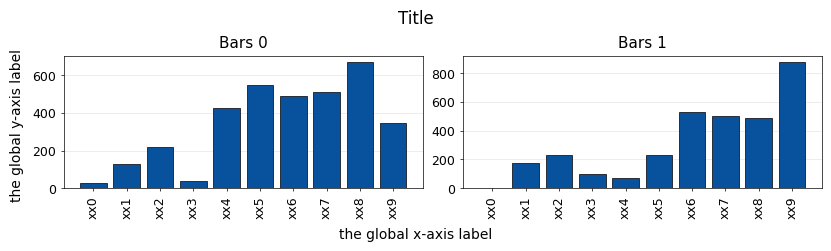

In [13]:
bar_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True,  # show charts as subplots
        "show_grid": "y",
        # "show_legend": True, # show_legend is not supported
    }
)

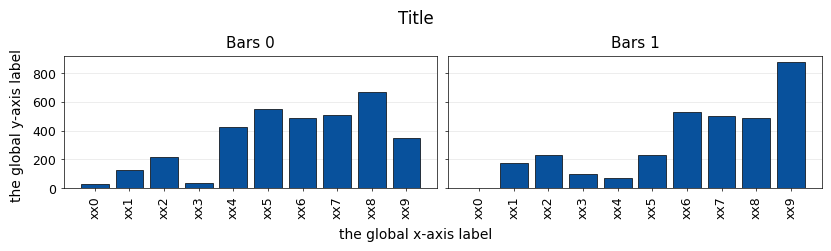

In [14]:
bar_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True,  # show charts as subplots
        "sharex": True,  # share the x-axis across subplots
        "sharey": True,  # share the y-axis across subplots
        "show_grid": "y",
    }
)

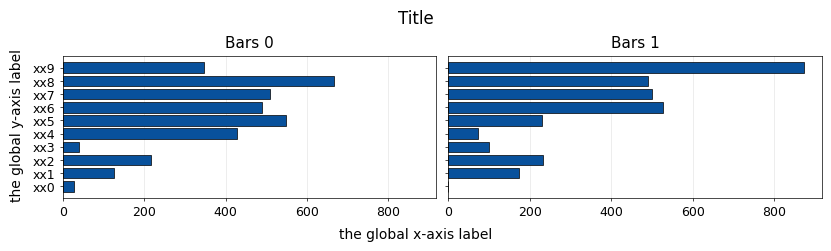

In [15]:
bar_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True,
        "sharex": True,
        "sharey": True,
        "show_grid": "x",
        "orientation": "horizontal",  # options: "horizontal", "vertical"
    }
)

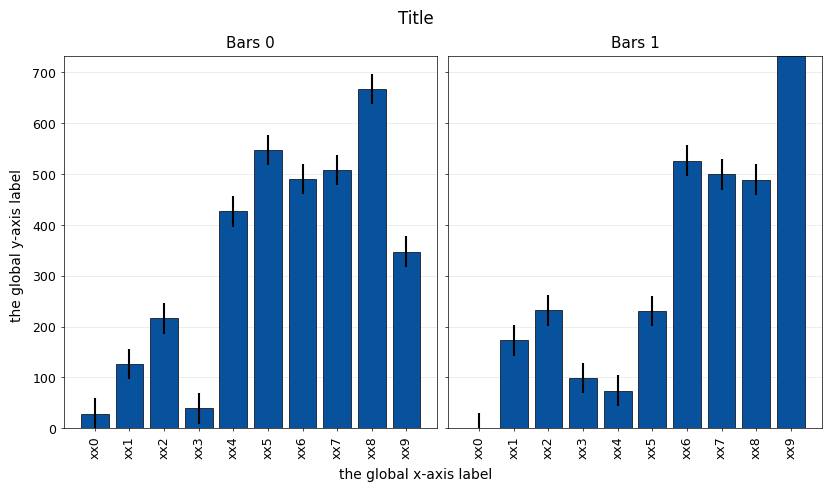

In [16]:
bar_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_2_ROWS,
        "subplots": True,  # show charts as subplots
        "sharex": True,
        "sharey": True,
        "show_grid": "y",
        "show_yerr": True,
        "y_min": 0,
    }
)

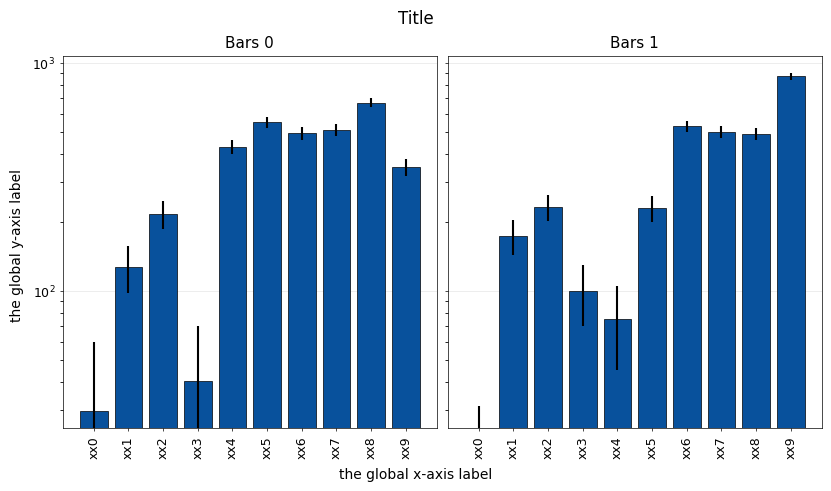

In [17]:
bar_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_2_ROWS,
        "subplots": True,  # show charts as subplots
        "sharex": True,
        "sharey": True,
        "show_grid": "y",
        "show_yerr": True,
        "log_scale": True,
    }
)